In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from scipy import stats
import os
import subprocess

#import seaborn as sns
import sys
import scipy
sys.path.append('External_Functions')
from ExternalFunctions import Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax 

from sympy import *
import random
import math
import pandas as pd

import matplotlib as mpl
mpl.rcParams['figure.figsize']   = (10,6)
mpl.rcParams['axes.prop_cycle']  = mpl.cycler(color=['#5E3C99','#018571','#4DAC26','#0571B0','#404040'])
mpl.rcParams['font.size']        = 13 # standard er 45
mpl.rcParams['lines.color']      = 'r'
mpl.rcParams['lines.markersize'] = 13
plt.rcParams['figure.constrained_layout.use'] = True



def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))


<ipython-input-2-e253334a9207>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([ 0, -50, -25, 0, 25, 50])


[0.02       0.02040816 0.02083333 0.0212766  0.02173913 0.02222222
 0.02272727 0.02325581 0.02380952 0.02439024 0.025      0.02564103
 0.02631579 0.02702703 0.02777778 0.02857143 0.02941176 0.03030303
 0.03125    0.03225806 0.03333333 0.03448276 0.03571429 0.03703704
 0.03846154 0.04       0.04166667 0.04347826 0.04545455 0.04761905
 0.05       0.05263158 0.05555556 0.05882353 0.0625     0.06666667
 0.07142857 0.07692308 0.08333333 0.09090909 0.1        0.11111111
 0.125      0.14285714 0.16666667 0.2        0.25       0.33333333
 0.5        1.         1.         1.         0.5        0.33333333
 0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
 0.1        0.09090909 0.08333333 0.07692308 0.07142857 0.06666667
 0.0625     0.05882353 0.05555556 0.05263158 0.05       0.04761905
 0.04545455 0.04347826 0.04166667 0.04       0.03846154 0.03703704
 0.03571429 0.03448276 0.03333333 0.03225806 0.03125    0.03030303
 0.02941176 0.02857143 0.02777778 0.02702703 0.02631579 0.0256

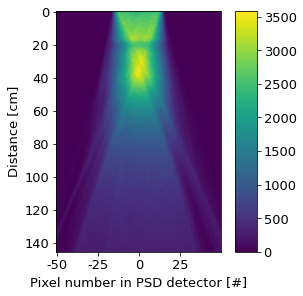

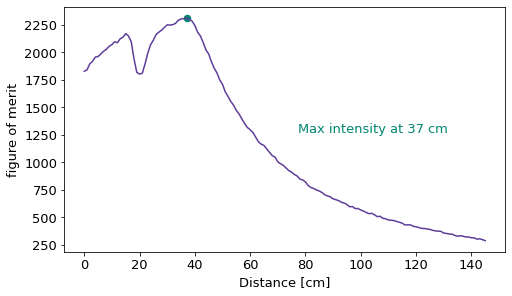

In [2]:
calib1 = np.arange(0,146,1)

pathname_old_mid = '/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/Resolution_intrument/psd_scan_2/'

weights = []

for i in range(-50,50):
    if i != 0:
        weights.append(abs(i**(-1)))
    if i == 0:
        weights.append(1)
    
weights = np.asarray(weights)

y = []

avg_vals = []
avg_stds = []
std_std = []

for i in calib1:
    path = str(pathname_old_mid+str(i))+'/Vir_SlitMonitor.dat'
    data = np.loadtxt(path)
    y.append(data[250])
    #plt.plot(np.arange(-50,50,1),data[250])
    avg_std = weighted_avg_and_std(data[250], weights)
    avg_stds.append(avg_std[0])
    std_std.append(avg_std[1])

    
y = np.asarray(y)
#max_vals = np.asarray(max_vals)

#print(np.where(ang_vals==np.max(avg_vals)))

avg_stds = np.asarray(avg_stds)
op_dist = np.where(avg_stds==np.max(avg_stds))


fig1, ax1 = plt.subplots(figsize=(7,4))
plot = ax1.imshow(y)
ax1.set_xticklabels([ 0, -50, -25, 0, 25, 50])
ax1.set_xlabel('Pixel number in PSD detector [#]')
ax1.set_ylabel('Distance [cm]')
fig1.colorbar(plot)
fig1.savefig('beam_crossection.pdf')

fig2, ax2 = plt.subplots(figsize=(7,4))
ax2.errorbar(calib1, avg_stds)
ax2.set_ylabel('figure of merit')
ax2.set_xlabel('Distance [cm]')
ax2.plot(np.where(avg_stds==np.max(avg_stds)), np.max(avg_stds),'.')
ax2.text(0.7, 0.5, 'Max intensity at 37 cm', horizontalalignment='center', verticalalignment='center', color='#018571',transform=ax2.transAxes)
fig2.savefig('average_intenity.pdf')

print(weights)
print(np.where(avg_stds==np.max(avg_stds)))

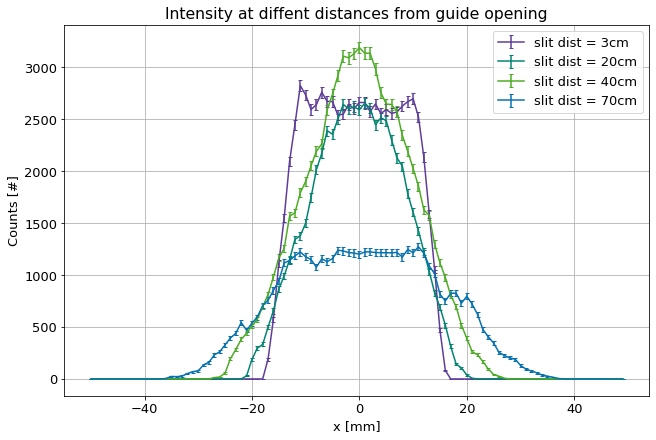

In [3]:
fig_dist, ax_dist = plt.subplots(figsize=(9,6))
plt.errorbar(np.arange(-50,50,1),y[4],yerr=np.sqrt(y[4]), capsize=2,label='slit dist = 3cm')
plt.errorbar(np.arange(-50,50,1),y[21],yerr=np.sqrt(y[21]), capsize=2,label='slit dist = 20cm')
#plt.errorbar(np.arange(-50,50,1),y[31],yerr=np.sqrt(y[31]), capsize=2,label='slit dist = 30cm')
plt.errorbar(np.arange(-50,50,1),y[41],yerr=np.sqrt(y[41]), capsize=2,label='slit dist = 40cm')
plt.errorbar(np.arange(-50,50,1),y[71],yerr=np.sqrt(y[71]), capsize=2,label='slit dist = 70cm')
plt.xlabel('x [mm]')
plt.ylabel('Counts [#]')
plt.title('Intensity at diffent distances from guide opening')
plt.grid()
plt.savefig('virtual_slit_dist.png')
plt.legend()